# Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from  scipy.stats import norm

# Importing data:

In [6]:
#df_train = pd.read_csv('/kaggle/input/insurance-claim-analysis-demographic-and-health/insurance_data.csv')
df_train = pd.read_csv('insurance_data.csv')
df_train

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


# About each feature

PatientID (Index): Category - Identifier, Type - Categorical

An identifier for each row.
age: Category - Demographic, Type - Numerical

The age of the patient.
gender: Category - Demographic, Type - Categorical

The gender of the patient (e.g., male).
bmi: Category - Health, Type - Numerical

The Body Mass Index (BMI) of the patient.
bloodpressure: Category - Health, Type - Numerical

The blood pressure of the patient.
diabetic: Category - Health, Type - Categorical

Indicates whether the patient is diabetic (e.g., Yes or No).
children: Category - Demographic, Type - Numerical

The number of children the patient has.
smoker: Category - Lifestyle, Type - Categorical

Indicates whether the patient is a smoker (e.g., Yes or No).
region: Category - Demographic, Type - Categorical

The region where the patient is located (e.g., southeast or northwest).
claim: Category - Financial, Type - Numerical

The insurance claim amount associated with the patient.


# Data cleaning

In [7]:
total = df_train.isnull().sum()
percent = (total / len(df_train)) * 100
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_values)
df_train = df_train.drop('index',axis=1)

               Total   Percent
index              0  0.000000
PatientID          0  0.000000
age                5  0.373134
gender             0  0.000000
bmi                0  0.000000
bloodpressure      0  0.000000
diabetic           0  0.000000
children           0  0.000000
smoker             0  0.000000
region             3  0.223881
claim              0  0.000000


In [8]:
mean_age = np.mean(df_train['age'])
# Fill null values in the 'age' column with the mean age
df_train['age'].fillna(mean_age, inplace=True)

# Check if there are any missing values in the 'age' column after filling
missing_values = df_train['age'].isnull().sum()
print("Missing values in 'age' column after filling:", missing_values)


Missing values in 'age' column after filling: 0


In [9]:
df_train.dropna(subset=['region'],inplace=True)

# Check if there are any missing values in the 'region' column after droping
missing_values = df_train['region'].isnull().sum()
print("Missing values in 'region' column after filling:", missing_values)

Missing values in 'region' column after filling: 0


In [10]:
df_train.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,671.970830,38.086308,30.672924,94.169035,1.095737,13279.668295
std,386.153126,11.091990,6.112768,11.438582,1.205571,12109.827623
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,338.000000,29.000000,26.200000,86.000000,0.000000,4746.340000
50%,672.000000,38.000000,30.400000,92.000000,1.000000,9386.160000
75%,1006.000000,47.000000,34.700000,99.000000,2.000000,16657.720000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


# Column types

## Numerical : Patient ID, age,bmi,bloodpressure,children,claim

## Categorical : gender,diabetic,smoker,region


In [11]:
df_train.sample(5)

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
361,362,27.0,female,26.7,99,No,1,No,southeast,5002.78
811,812,59.0,female,32.3,97,Yes,1,No,northeast,11512.41
732,733,53.0,female,31.2,86,Yes,0,No,southeast,10338.93
59,60,47.0,male,33.8,90,No,1,No,southeast,1725.55
308,309,41.0,male,26.9,90,No,1,No,southeast,4441.21


# Univariate analysis

### Age

Conclusion:

-> Age has 5 missing values

-> data has two peaks and skewness of  0.11 so data is distriubuted bimodaly which means two age groups have claimed insurance most so one new column can be added to identify these age groups

-> there are no outliers

-> max age is recorded 60 and mean age is 38 which shows very old people have not been insured

In [12]:
df_train['age'].describe()

count    1337.000000
mean       38.086308
std        11.091990
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

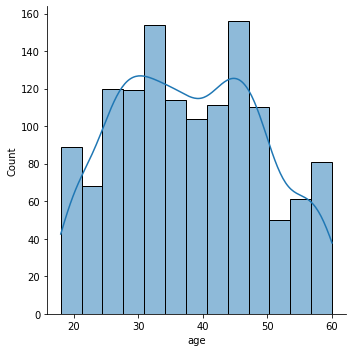

In [13]:
sns.displot(df_train['age'],kde=True)

<AxesSubplot: ylabel='Density'>

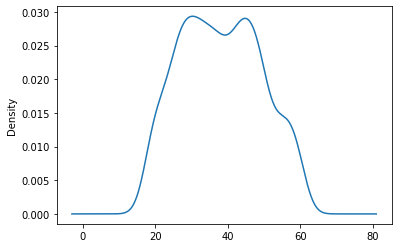

In [14]:
df_train['age'].plot(kind='kde')

In [15]:
print('skewness in age is ' ,df_train['age'].skew())

skewness in age is  0.11194591001235128


<AxesSubplot: >

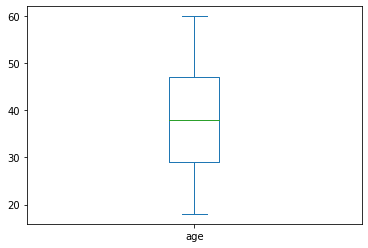

In [16]:
df_train['age'].plot(kind='box')

### Feature engineering on age:
#### Categorizing age:

In [17]:
def age_categorizer(age):
  if 18<age<24:
    return "Young adult"
  if 24<=age<=39:
    return "Adults"
  if 40<=age:
    return "Senior adults"
df_train['age_category']=df_train['age'].apply(age_categorizer)

analyzing age categories:

finding:                                                                               -> 46% persons are senior adults age above 40 and 44.2% persons are adults which is causing two peaks in data


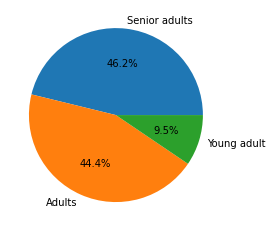

In [18]:
age_count=df_train['age_category'].value_counts()
plt.pie(age_count,labels=age_count.index,autopct='%1.1f%%')
plt.show()

### bmi

Conclusion :

->distribution is perfectly normal

->  skewness is very minimal

-> boxplot indicated some serious outliers ,, bmi above 50 shows very obese and its very fatal

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15848\2163789744.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['bmi'])


<AxesSubplot: xlabel='bmi', ylabel='Density'>

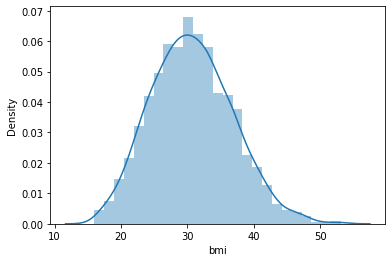

In [19]:
sns.distplot(df_train['bmi'])

In [20]:
df_train['bmi'].describe()

count    1337.000000
mean       30.672924
std         6.112768
min        16.000000
25%        26.200000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

<AxesSubplot: ylabel='Density'>

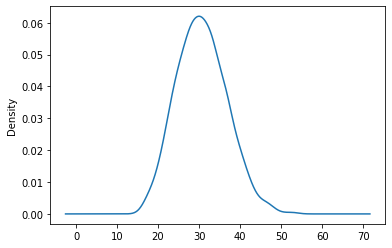

In [21]:
df_train['bmi'].plot(kind='kde')

In [22]:
df_train['bmi'].skew()

0.28393685213280595

<AxesSubplot: >

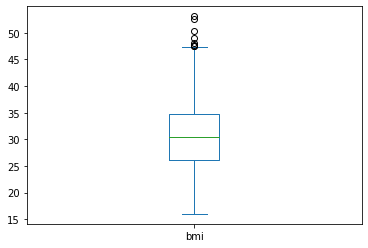

In [23]:
df_train['bmi'].plot(kind='box')

In [24]:
df_train[df_train['bmi']>35].count()

PatientID        317
age              317
gender           317
bmi              317
bloodpressure    317
diabetic         317
children         317
smoker           317
region           317
claim            317
age_category     313
dtype: int64

### Feature engineering on bmi (categorizing)

In [25]:
def bmi_categorizer(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Healthy"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    elif bmi >= 30 and bmi < 40:
        return "Obese"
    else:
        return "Very Obese"

# Assuming you have a 'bmi' column in your DataFrame 'df_train'
df_train['bmi_category'] = df_train['bmi'].apply(bmi_categorizer)


### Analysis on bmi category feature

finding:                                                                                          
     -> Most of people almost 46% are obese i.e 615 persons                                                        
     -> 8.1% i.e 92 person were severely obese causing health problems


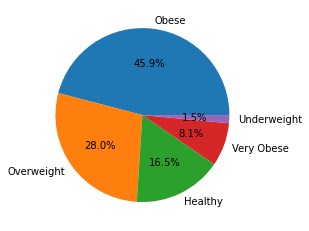

In [26]:
#plotting pie chart
bmi_count = df_train['bmi_category'].value_counts()
plt.pie(bmi_count,labels=bmi_count.index,autopct='%1.1f%%')
plt.show()

In [27]:
df_train[df_train['bmi']>40].count()

PatientID        92
age              92
gender           92
bmi              92
bloodpressure    92
diabetic         92
children         92
smoker           92
region           92
claim            92
age_category     90
bmi_category     92
dtype: int64

In [28]:
df_train[df_train['bmi_category']=='Healthy'].count()

PatientID        220
age              220
gender           220
bmi              220
bloodpressure    220
diabetic         220
children         220
smoker           220
region           220
claim            220
age_category     220
bmi_category     220
dtype: int64

In [29]:
df_train[df_train['bmi_category']=='Obese'].count()

PatientID        614
age              614
gender           614
bmi              614
bloodpressure    614
diabetic         614
children         614
smoker           614
region           614
claim            614
age_category     607
bmi_category     614
dtype: int64

### bloodpressure

conclusion:

-> data is highly positively skewed with skewness of 1.48

-> boxplot shows some serious outliers which is cause of positive skewness

-> bp higher than 120 is counted 55 , so 55 persons  due to bp shootup

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15848\2871198053.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['bloodpressure'])


<AxesSubplot: xlabel='bloodpressure', ylabel='Density'>

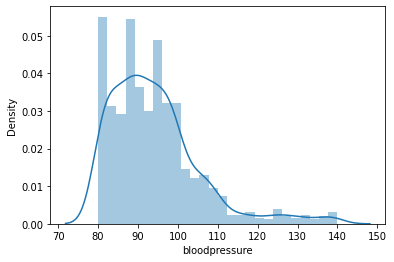

In [30]:
sns.distplot(df_train['bloodpressure'])

In [31]:
df_train['bloodpressure'].skew()

1.4836348354148527

<AxesSubplot: ylabel='Density'>

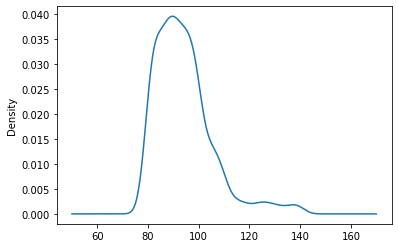

In [32]:
df_train['bloodpressure'].plot(kind='kde')

<AxesSubplot: ylabel='Frequency'>

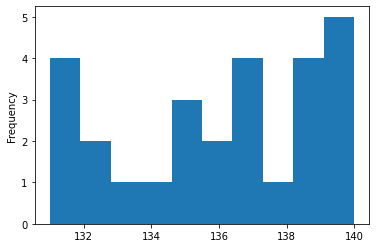

In [33]:
col=df_train[df_train['bloodpressure']>130]
col['bloodpressure'].plot(kind='hist')

In [34]:
df_train['bloodpressure'].describe()

count    1337.000000
mean       94.169035
std        11.438582
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

<AxesSubplot: >

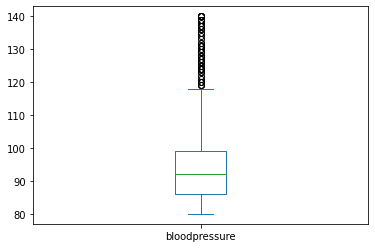

In [35]:
df_train['bloodpressure'].plot(kind='box')

In [36]:
df_train[df_train['bloodpressure']<120]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category,bmi_category
0,1,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87,Adults,Healthy
1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51,Adults,Obese
2,3,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94,Adults,Obese
3,4,38.078652,male,33.7,80,No,0,No,northwest,1136.40,Adults,Obese
4,5,38.078652,male,34.1,100,No,0,No,northwest,1137.01,Adults,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...
1331,1332,18.000000,male,41.1,104,No,1,Yes,southeast,48970.25,None,Very Obese
1335,1336,44.000000,female,35.5,88,Yes,0,Yes,northwest,55135.40,Senior adults,Obese
1337,1338,30.000000,male,34.5,91,Yes,3,Yes,northwest,60021.40,Adults,Obese
1338,1339,37.000000,male,30.4,106,No,0,Yes,southeast,62592.87,Adults,Obese


In [37]:
df_train[df_train['bloodpressure']<120].count()

PatientID        1278
age              1278
gender           1278
bmi              1278
bloodpressure    1278
diabetic         1278
children         1278
smoker           1278
region           1278
claim            1278
age_category     1262
bmi_category     1278
dtype: int64

## Feature engineering on bloodpressure (categorizing):


In [38]:
df_train[df_train['bloodpressure']<80].count()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
age_category     0
bmi_category     0
dtype: int64

no one has low bloodpressure

In [39]:
def bp_categorizer(bp):
    if 80<=bp < 89:
        return "elevated"
    elif 90<= bp <= 99:
        return "High"
    elif  99< bp <100:
        return "very high"
    elif 100<=bp<120:
        return "extremely high"
    else:
        return "fatal"

# Assuming you have a 'bmi' column in your DataFrame 'df_train'
df_train['bp_category'] = df_train['bloodpressure'].apply(bp_categorizer)


### Lets find which how much people have high bp and their cause of death might be high bp

### finding:                                         
        -> There is high chance that many people have been died due to high bloodpressure or they are patients of hypertension
        -> 37.2% of people were suffering from stage 1 hypertension with bp higher than 90 (diastolic)
        -> 19.1% have stage 2 hypertension in this all category all are having more than 100 mmHg(diastolic)
        -> 8.7% have higher than 120 and some also have higher than 140
        bloodpressure which is fatal and we can say bp shootup is cause of
        death of these 117 pesons
        -> Approx Total 813 persons were suffering from hyper tension,out of
        which 498 on stage 1, 315 on stage 2 and 117 were probably died due to
        it because they had high bp than 120 and 55 person had higher than 145

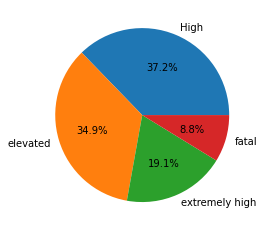

In [40]:
category_counts = df_train['bp_category'].value_counts()
plt.pie(category_counts,labels= category_counts.index,  autopct='%1.1f%%')
plt.show()

In [41]:
df_train[df_train['bloodpressure']>=90].count()

PatientID        812
age              812
gender           812
bmi              812
bloodpressure    812
diabetic         812
children         812
smoker           812
region           812
claim            812
age_category     798
bmi_category     812
bp_category      812
dtype: int64

In [42]:
df_train[df_train['bloodpressure']>=100].count()

PatientID        314
age              314
gender           314
bmi              314
bloodpressure    314
diabetic         314
children         314
smoker           314
region           314
claim            314
age_category     310
bmi_category     314
bp_category      314
dtype: int64

In [43]:
df_train[df_train['bp_category']=='fatal'].count()

PatientID        117
age              117
gender           117
bmi              117
bloodpressure    117
diabetic         117
children         117
smoker           117
region           117
claim            117
age_category     117
bmi_category     117
bp_category      117
dtype: int64

### Claim:

conclusion:

-> highly skewed data with positve skewness of 1.5

-> there are more than 150 outliers which shows some people have been given more claim. there could be multiple reasons we will find in further analysis



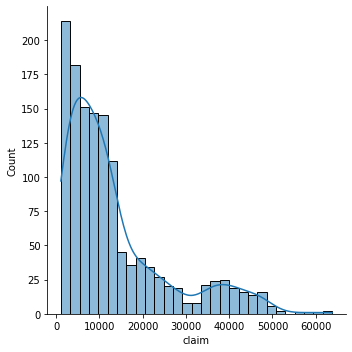

In [44]:
sns.displot(df_train['claim'],kde=True)
plt.show()

<AxesSubplot: ylabel='Density'>

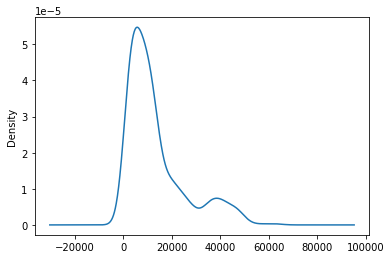

In [45]:
df_train['claim'].plot(kind='kde')

In [46]:
df_train['claim'].skew()

1.5155834070803003

In [47]:
df_train['claim'].describe()

count     1337.000000
mean     13279.668295
std      12109.827623
min       1121.870000
25%       4746.340000
50%       9386.160000
75%      16657.720000
max      63770.430000
Name: claim, dtype: float64

<AxesSubplot: >

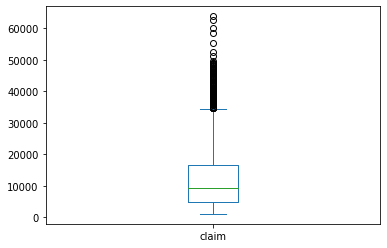

In [48]:
df_train['claim'].plot(kind='box')

In [49]:
df_train[df_train['claim']>30000].count()

PatientID        162
age              162
gender           162
bmi              162
bloodpressure    162
diabetic         162
children         162
smoker           162
region           162
claim            162
age_category     160
bmi_category     162
bp_category      162
dtype: int64

In [50]:
df_train[df_train['claim']<30000].count()

PatientID        1175
age              1175
gender           1175
bmi              1175
bloodpressure    1175
diabetic         1175
children         1175
smoker           1175
region           1175
claim            1175
age_category     1161
bmi_category     1175
bp_category      1175
dtype: int64

In [51]:
stats.iqr(df_train['claim'])

11911.380000000001

### Gender

Conclusion:

->  male and female are almost in same quantity

In [52]:
df_train['gender'].value_counts()

male      675
female    662
Name: gender, dtype: int64

<AxesSubplot: >

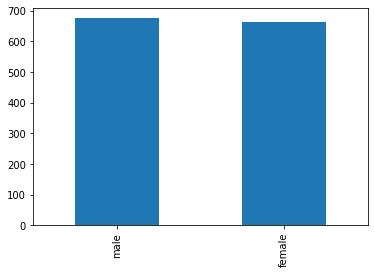

In [53]:
df_train['gender'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='gender'>

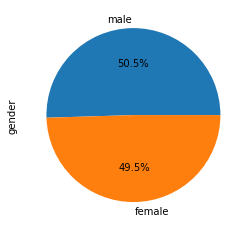

In [54]:
df_train['gender'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [55]:
df_train['gender'].isnull().sum()

0

In [56]:
df_train.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category,bmi_category,bp_category
0,1,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87,Adults,Healthy,High
1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51,Adults,Obese,elevated
2,3,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94,Adults,Obese,elevated
3,4,38.078652,male,33.7,80,No,0,No,northwest,1136.40,Adults,Obese,elevated
4,5,38.078652,male,34.1,100,No,0,No,northwest,1137.01,Adults,Obese,extremely high


### diabetic

conclusion:
-> most patients are non diabetic but there is no more difference

In [57]:
df_train['diabetic'].value_counts()

No     697
Yes    640
Name: diabetic, dtype: int64

<AxesSubplot: >

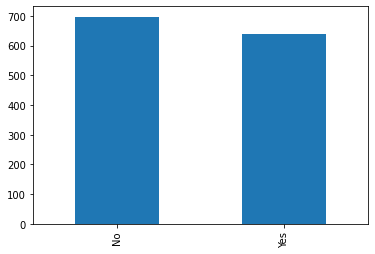

In [58]:
df_train['diabetic'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='diabetic'>

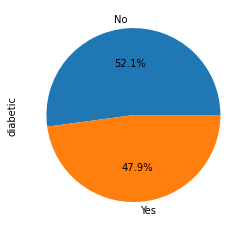

In [59]:
df_train['diabetic'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Children:

conclusion :  most people are children less and number of children is increasing upto 5

In [60]:
df_train['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot: >

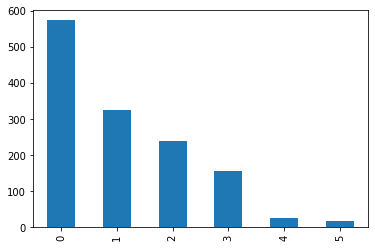

In [61]:
df_train['children'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='children'>

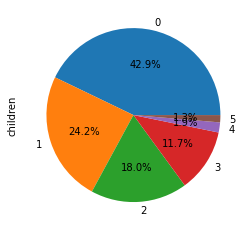

In [62]:
df_train['children'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### smoker

conclusion:
 80% percent people are not smokers

In [63]:
df_train['smoker'].value_counts()

No     1063
Yes     274
Name: smoker, dtype: int64

<AxesSubplot: >

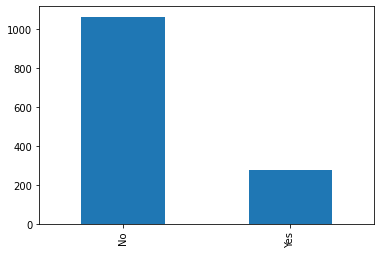

In [64]:
df_train['smoker'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='smoker'>

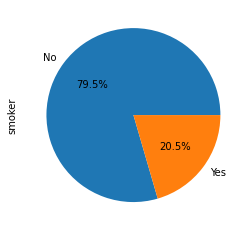

In [65]:
df_train['smoker'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### region

conclusion : most people are from southeast then northwest then southwest then northwest

In [66]:
df_train['region'].value_counts()

southeast    443
northwest    349
southwest    314
northeast    231
Name: region, dtype: int64

<AxesSubplot: >

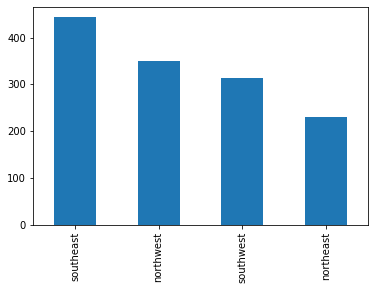

In [67]:
df_train['region'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='region'>

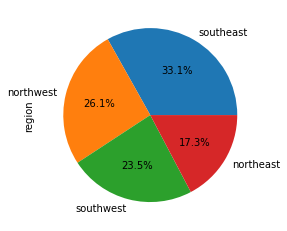

In [68]:
df_train['region'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [69]:
df_train.sample(5)

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category,bmi_category,bp_category
1258,1259,38.0,female,34.8,132,No,2,Yes,southwest,39836.52,Adults,Obese,fatal
615,616,54.0,female,29.4,96,Yes,1,No,southeast,8547.69,Senior adults,Overweight,High
483,484,48.0,male,42.4,92,Yes,5,No,southwest,6666.24,Senior adults,Very Obese,High
869,870,40.0,male,37.1,84,Yes,1,No,southwest,12347.17,Senior adults,Obese,elevated
236,237,59.0,female,34.8,85,Yes,0,No,northwest,3556.92,Senior adults,Obese,elevated


# BiVARIATE ANALYSIS:

## Numerical vs Numerical

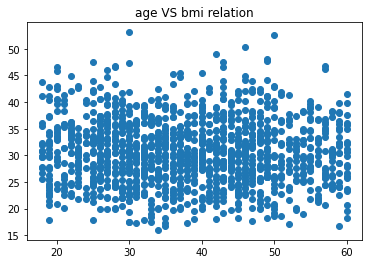

In [70]:
plt.scatter(df_train['age'],df_train['bmi'])
plt.title('age VS bmi relation')
plt.show()

### bloodpressure vs claim:

correlation between bloodpressure and claim is 0.53 so they are most related with respect to heatmap

finding:


      -> people having hypertension on stage 1 have low claim and they're in majority
      -> some people having fatal hypertension have high claim so high bloospressure can cause high claim

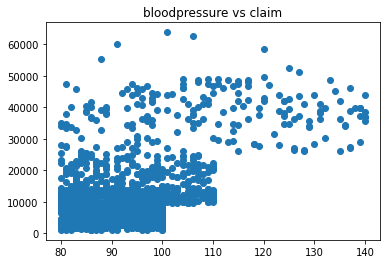

In [71]:
plt.scatter(df_train['bloodpressure'],df_train['claim'])
plt.title('bloodpressure vs claim')
plt.show()

### claim vs bp_category:

### finding:
->persons having fatal bp i.e severe hypertension have high claim so high bp caused high claim

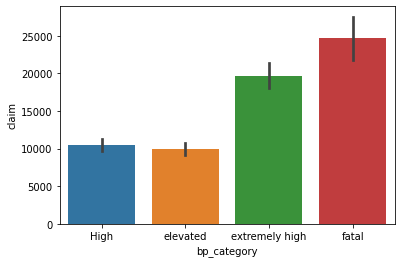

In [72]:
sns.barplot(x=df_train['bp_category'],y=df_train['claim'])
plt.xlabel('bp_category')
plt.ylabel('claim')
plt.show()

### age and claim

no relation as corr is only 0.2 AND graphs are constant too

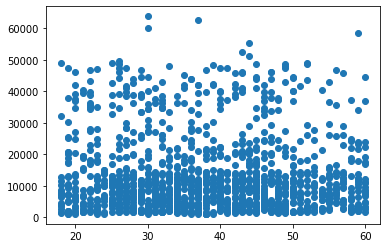

In [73]:
plt.scatter(df_train['age'],df_train['claim'])
plt.show()

In [74]:
correlation = df_train['claim'].corr(df_train['age'])
correlation

-0.028579665479836713

### Gender vs bloodpressure:

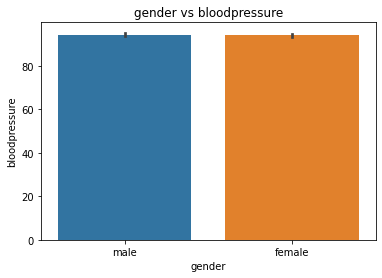

In [75]:
## plotting a barplot to find which gender had the fatal hypertension
sns.barplot(x=df_train['gender'],y=df_train['bloodpressure'])
plt.xlabel('gender')
plt.ylabel('bloodpressure')
plt.title('gender vs bloodpressure')
plt.show()

### gender vs bmi_category

In [76]:
table = pd.crosstab(df_train['gender'],df_train['bmi_category'],normalize=True)
print(table)

bmi_category   Healthy     Obese  Overweight  Underweight  Very Obese
gender                                                               
female        0.085266  0.219147    0.142857     0.008975    0.038893
male          0.079282  0.240090    0.137622     0.005984    0.041885


### finding:
 there is no much difference in male and female bmi_categories which means almost each categories has same amount of distribution of male and female

## smoker vs bp_category:

In [77]:

smoker_count= df_train['smoker'].value_counts()
smoker_count

No     1063
Yes     274
Name: smoker, dtype: int64

In [78]:
pd.crosstab(df_train['smoker'],df_train['bp_category'],normalize=True)

bp_category,High,elevated,extremely high,fatal
smoker,,,,
No,0.326851,0.305909,0.118175,0.044129
Yes,0.045625,0.043381,0.072550,0.043381


## diabetic vs claim:

 Finding:

 Both diabetic and non-diabetic individuals show an equal distribution of claims, suggesting that diabetes does not appear to be a significant factor in determining claim frequency."

In [79]:

diabetic_count= df_train['diabetic'].value_counts()
diabetic_count

No     697
Yes    640
Name: diabetic, dtype: int64

<AxesSubplot: xlabel='diabetic', ylabel='claim'>

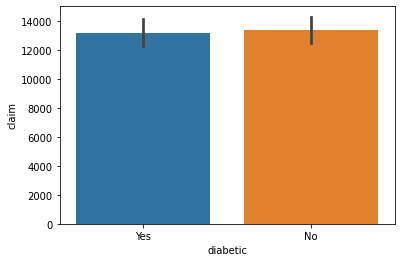

In [80]:
sns.barplot(x=df_train['diabetic'],y=df_train['claim'])

### bmi vs diabetic

### finding: diabetes is not affecting bmi

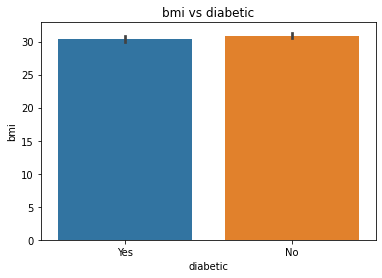

In [81]:
sns.barplot(x=df_train['diabetic'],y=df_train['bmi'])
plt.xlabel('diabetic')
plt.ylabel('bmi')
plt.title('bmi vs diabetic')
plt.show()

In [82]:
pd.crosstab(df_train['diabetic'],df_train['bmi_category'],normalize=True)

bmi_category,Healthy,Obese,Overweight,Underweight,Very Obese
diabetic,,,,,
No,0.077038,0.242334,0.148841,0.007479,0.045625
Yes,0.087509,0.216904,0.131638,0.007479,0.035153


In [83]:
df_train.sample(5)

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category,bmi_category,bp_category
232,233,49.0,male,32.5,93,Yes,1,No,southeast,3490.55,Senior adults,Obese,High
1149,1150,57.0,female,24.4,104,Yes,0,Yes,southeast,26125.67,Senior adults,Healthy,extremely high
1285,1286,49.0,male,34.2,98,Yes,2,Yes,southwest,42856.84,Senior adults,Obese,High
1250,1251,42.0,male,37.8,106,No,2,Yes,southwest,39241.44,Senior adults,Obese,extremely high
745,746,40.0,male,22.1,83,Yes,0,No,southwest,10577.09,Senior adults,Healthy,elevated


### Children vs claim:

### finding:
        
         -> so people having less children have more claim so we can say relation is inverse somehow

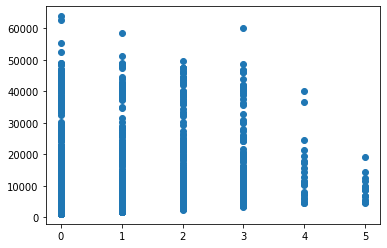

In [84]:
plt.scatter(df_train['children'],df_train['claim'])
plt.show()

## Smoker vs Claim:

finding:

-> smoker persons have high claim

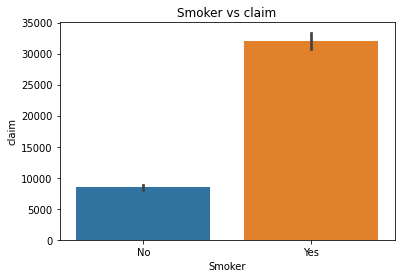

In [85]:
sns.barplot(x=df_train['smoker'],y=df_train['claim'])
plt.xlabel('Smoker')
plt.ylabel('claim')
plt.title('Smoker vs claim')
plt.show()

## region vs claim:




### finding:
     -> people from northeast have more claim  however only 17.3% people belong from northeast region

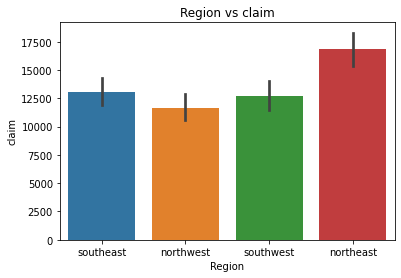

In [86]:
sns.barplot(x=df_train['region'],y=df_train['claim'])
plt.xlabel('Region')
plt.ylabel('claim')
plt.title('Region vs claim')
plt.show()

# Multivariate analysis:

## Smoker vs gender vs claim

### finding:
       ->  both male and female smokers have  higher claims than non smokers

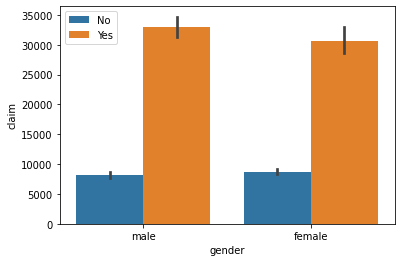

In [87]:
sns.barplot(x=df_train['gender'],y=df_train['claim'],hue=df_train['smoker'])
plt.legend()
plt.show()

## bp_category vs smoker vs claim

## finding:
       -> smoker peson having fatal hypertension have claimed the most

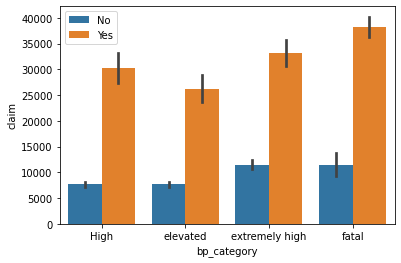

In [88]:
sns.barplot(x=df_train['bp_category'],y=df_train['claim'],hue=df_train['smoker'])
plt.legend()
plt.show()

In [89]:
df_train.sample(4)

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category,bmi_category,bp_category
729,730,31.0,male,28.7,107,Yes,3,No,northwest,10264.44,Adults,Overweight,extremely high
841,842,23.0,male,21.8,92,No,2,No,southeast,11884.05,Young adult,Healthy,High
345,346,33.0,male,18.9,87,Yes,3,No,southeast,4827.90,Adults,Healthy,elevated
756,757,26.0,male,35.6,106,Yes,4,No,northeast,10736.87,Adults,Obese,extremely high


## diabetic vs smoker vs claim

###finding:
     -> diabetic and non diabetic smokers both have high claim and diabetic or  
      non diabetic non smokers have low claim so diabetes didnt affect claim

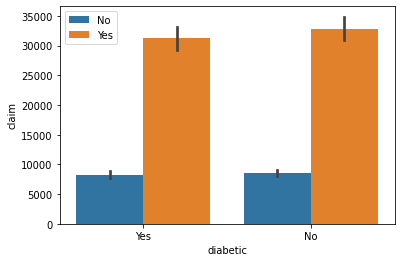

In [90]:
sns.barplot(x=df_train['diabetic'],y=df_train['claim'],hue=df_train['smoker'])
plt.legend()
plt.show()

## bmi_category vs smoker vs claim

##finding:
        -> obese and very obese smoker have claimed high

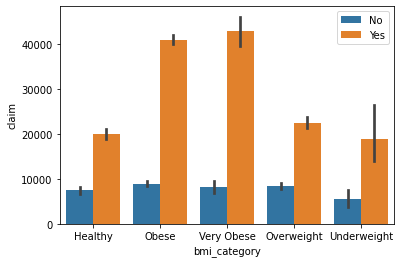

In [91]:
sns.barplot(x=df_train['bmi_category'],y=df_train['claim'],hue=df_train['smoker'])
plt.legend()
plt.show()

## region vs smoker vs claim

### finding:
           -> southeast smokers have claimed the most

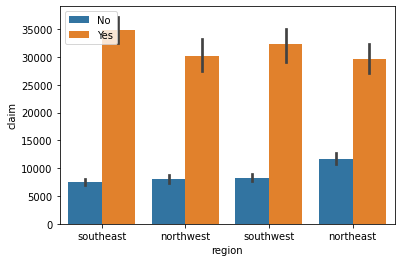

In [92]:
sns.barplot(x=df_train['region'],y=df_train['claim'],hue=df_train['smoker'])
plt.legend()
plt.show()

## bp_category vs bmi_category vs claim

## finding :           
          ->obese person with fatal hypertension and
            very obese persons with stage 2 hypertension have claimed the most

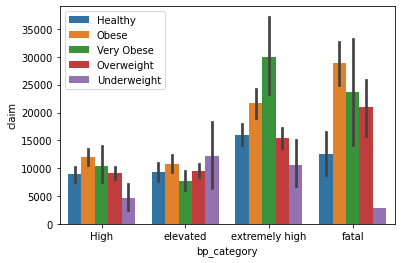

In [93]:
sns.barplot(x=df_train['bp_category'],y=df_train['claim'],hue=df_train['bmi_category'])
plt.legend()
plt.show()

### age_category vs smoke vs column:

## finding:
       -> all smokers of any age category in dataset have claimed high

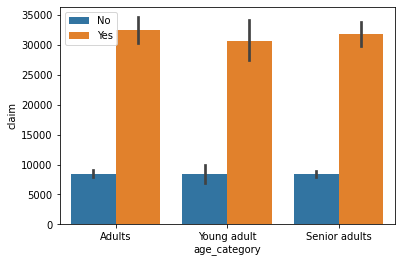

In [94]:
sns.barplot(x=df_train['age_category'],y=df_train['claim'],hue=df_train['smoker'])
plt.legend()
plt.show()

### region vs bp_category vs claim:

## finding:
      ->Northeastern people and southwestern people with fatal hypertension  have claimed high

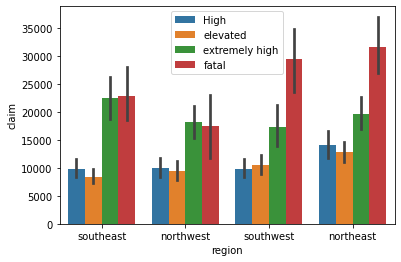

In [95]:
sns.barplot(x=df_train['region'],y=df_train['claim'],hue=df_train['bp_category'])
plt.legend()
plt.show()

## children vs smoker vs claim:

## finding :     
       -> smokers with 2 and 3 children have claimed highest
       -> people with 4,5 children have claimed low whether smokers or non smokers

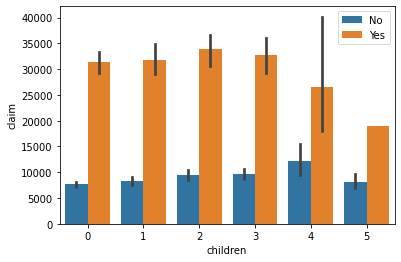

In [96]:
sns.barplot(x=df_train['children'],y=df_train['claim'],hue=df_train['smoker'])
plt.legend()
plt.show()

## children vs region vs claim:

## finding:
        -> northeastern  people with 3 children have claimed high

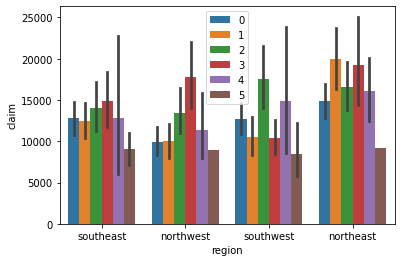

In [97]:
sns.barplot(x=df_train['region'],y=df_train['claim'],hue=df_train['children'])
plt.legend()
plt.show()

## children vs bp_category vs claim:

### finding:
   -> people having 2,3 children with stage 2 or fatal hypertension i.e bp above 100 and 120 respectively (diastolic) have claimed high.

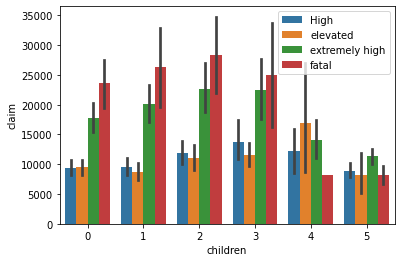

In [98]:
sns.barplot(x=df_train['children'],y=df_train['claim'],hue=df_train['bp_category'])
plt.legend()
plt.show()

### children vs bmi_category vs claim:

## finding:
    -> people with 2,3 children and are obese or very obese i.e bmi above 30 have clamed high

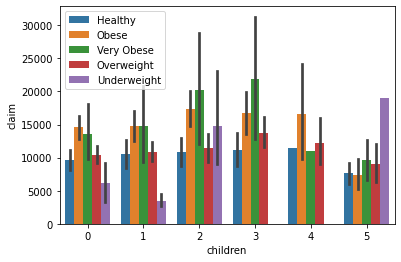

In [99]:
sns.barplot(x=df_train['children'],y=df_train['claim'],hue=df_train['bmi_category'])
plt.legend()
plt.show()

# Final conclusion:

### northeastern and southeastern smoker persons suffering from hypertension at stage 2 or fatal (bp>100) and are obese or very obese(bmi>30) have claimed the highest